In [1]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.vgg19 import VGG19
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.applications.mobilenet import MobileNet
from tensorflow.python.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.python.keras.preprocessing import image
import numpy as np
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
import os
import random
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import load_model

In [2]:
num_classes = 17

In [3]:

# import and compile model
num_classes = 17
# model = VGG16(include_top=True, weights=None, classes=2)
# model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# model = MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# last = model.output

# x = Flatten()(last)
# x = Dense(4096, activation='relu')(x)
# x = Dense(4096, activation='relu')(x)
# predictions = Dense(num_classes, activation = 'softmax')(x)
# model = Model(inputs = model.input, outputs = predictions)

model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
# reorder file
def reorder():
    path = 'data/'
    category = os.listdir(path)
    j = 0
    for c in category:
        images_of_each_category = os.listdir(path+c)
        print(images_of_each_category)
        for i in images_of_each_category:
            try:
                os.rename(path+c+'/'+i, path+c+'/'+'aa'+i)
                os.rename(path+c+'/'+i, path+c+'/'+str(j)+'.jpg')
            except:
                os.rename(path+c+'/'+str(j)+'.jpg', path+c+'/'+str(j)+str(10000)+'.jpg')
                os.rename(path+c+'/'+i, path+c+'/'+str(j)+'.jpg')
                j = j + 1
            j = j + 1

In [5]:

path = 'data/'
category_labels = {}
labels_category = {}
category = os.listdir(path)
images = []
not_one_hot_labels = []
for i in range(0, len(category)):
    category_labels[category[i]] = i
for i in range(0, len(category)):
    labels_category[i] = category[i]
for c in category:
    images_of_each_category = os.listdir(path+c)
    for i in images_of_each_category:
        img = image.load_img(path+c+'/'+i, target_size=(224, 224))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        images.append(x)
        not_one_hot_labels.append(category_labels[c])
# not_one_hot_labels_array = np.asarray(not_one_hot_labels)
labels = np.zeros(shape=(len(not_one_hot_labels), num_classes))
for i in range(0, len(not_one_hot_labels)):
    labels[i][int(not_one_hot_labels[i])] = 1
images = np.asarray(images)

In [6]:

# separate training set and validation set
index = np.arange(0, len(labels))
random.shuffle(index)
train_ind = index[0:int(len(index)/5*4)]
# val_ind = np.delete(index, train_ind)
val_ind = index[int(len(index)/5*4):len(index)]
train_labels = labels[train_ind]
val_labels = labels[val_ind]
train_images = images[train_ind]
val_images = images[val_ind]

In [7]:
len(val_ind)

137

In [8]:
model.predict(train_images[0:1]).shape

(1, 1, 1, 2048)

In [9]:
# training
# i = 0
# for i in range(0, int(len(train_labels)/5)):
#     model.fit(train_images[i*5:i*5+5], train_labels[i*5:i*5+5], epochs=5)

# get features
train_features = np.zeros(shape=(len(train_labels), 1, 1, 2048))   #ResNet
# train_features = np.zeros(shape=(len(train_labels), 7, 7, 512))   #VGG
# train_features = np.zeros(shape=(len(train_labels), 7, 7, 1024))     #MobileNet
i = 0
for i in range(0, int(len(train_labels)/5)):
    train_features[i*5:i*5+5] = model.predict(train_images[i*5:i*5+5])
# train_features = np.reshape(train_features, (len(train_labels), 7 * 7 * 512))

In [10]:
# feedforward NN model for classification


ff_model = models.Sequential([
    layers.Flatten(input_shape=(1, 1, 2048)),       #ResNet
#     layers.Flatten(input_shape=(7, 7, 512)),    #VGG
#     layers.Flatten(input_shape=(7, 7, 1024)),     #MobileNet
    layers.Dense(30, activation=tf.nn.relu),
#     layers.Dense(4096, activation=tf.nn.relu),
    layers.Dense(num_classes, activation=tf.nn.softmax)
])

ff_model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
# train
performance = ff_model.fit(train_features, train_labels, epochs = 50)


Epoch 1/50
546/546 [==============================] - 4s 8ms/step - loss: 2.8989 - acc: 0.1209
Epoch 2/50
546/546 [==============================] - 0s 203us/step - loss: 2.5407 - acc: 0.2454
Epoch 3/50
546/546 [==============================] - 0s 112us/step - loss: 2.3265 - acc: 0.3425
Epoch 4/50
546/546 [==============================] - 0s 99us/step - loss: 2.1228 - acc: 0.4029
Epoch 5/50
546/546 [==============================] - 0s 124us/step - loss: 1.9216 - acc: 0.4927 0s - loss: 1.9235 - acc: 0.486
Epoch 6/50
546/546 [==============================] - 0s 159us/step - loss: 1.6860 - acc: 0.6026
Epoch 7/50
546/546 [==============================] - 0s 395us/step - loss: 1.4943 - acc: 0.6703
Epoch 8/50
546/546 [==============================] - 0s 227us/step - loss: 1.3334 - acc: 0.7070
Epoch 9/50
546/546 [==============================] - 0s 216us/step - loss: 1.1931 - acc: 0.7399
Epoch 10/50
546/546 [==============================] - 0s 168us/step - loss: 1.0758 - acc: 0.7766
E

In [11]:
performance.history.get('loss')

[2.8989353083865548,
 2.5406525947235443,
 2.3265133026318674,
 2.1227577998961285,
 1.9215749174683958,
 1.6860443148420843,
 1.494320042404063,
 1.3333554355216113,
 1.1931386443721506,
 1.0758254934143234,
 0.97092830152302,
 0.8740429760335566,
 0.7842953847004817,
 0.703747903907692,
 0.6308671058097601,
 0.5632732005128057,
 0.5021454051082388,
 0.4485741871180552,
 0.397736472087902,
 0.3589261967293072,
 0.32143850771935434,
 0.2862513331703214,
 0.2602348559068673,
 0.23385395314339752,
 0.211827678776486,
 0.19037723617675978,
 0.17014875268433993,
 0.15181856558763937,
 0.13792436838750438,
 0.12248397061785499,
 0.11059024526086046,
 0.09968551069552645,
 0.08933094847988296,
 0.08023779011662407,
 0.0733875857168065,
 0.06486517229141334,
 0.06031273276760028,
 0.05539287440137658,
 0.05038913463893937,
 0.04535907965440016,
 0.0416742559153955,
 0.037345749172535574,
 0.03609982561388295,
 0.032193667350222624,
 0.030445406888867474,
 0.02918688802819549,
 0.0263863362699

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('ResNet50', fontsize=12)
plt.plot(performance.history.get('loss'), 'b')
# plt.plot(performance.history.get('acc'), 'r')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy Loss')

Text(0, 0.5, 'Cross Entropy Loss')

In [13]:
# get predictions on validation set
from tensorflow.python.keras.applications.imagenet_utils import decode_predictions
import numpy as np
pre = np.zeros(shape = (len(val_labels), num_classes))
j = 0
for j in range(0, int(len(val_labels)/5)):
    pre[j*5:j*5+5] = ff_model.predict(model.predict(val_images[j*5:j*5+5]))
# pre[j*5+5:len(pre)] = ff_model.predict(model.predict(val_images[j*5+5:len(pre)]))
    
# pre = ff_model.predict(model.predict(val_images))
result = np.zeros(len(val_labels))
gold_standard = np.zeros(len(val_labels))
for i in range(0, j*5+5):
    result[i] = np.argmax(pre[i])
for i in range(0, j*5+5):
    gold_standard[i] = np.argmax(val_labels[i])

In [14]:
confidences = []
confidence = {}
for i in range(len(pre)):
    top_3_idx = np.argsort(pre[i])[-3:]
    top_3_values = [pre[i][j] for j in top_3_idx]
    for j in range(0, 3):
        confidence[labels_category[top_3_idx[j]]] = top_3_values[j]*100
    confidences.append(confidence)
    confidence = {}

In [15]:
# test
def test(path):
    img = image.load_img(path, target_size=(224, 224))
    test = []
    x = image.img_to_array(img)
    x = preprocess_input(x)
    test.append(x)
    test = np.asarray(test)
    test.shape
    return ff_model.predict(model.predict(test))*100

In [43]:
labels = np.zeros(num_classes)
z = 0
s1 = 'Snake Species'
s2 = 'labels'
s3 = 'One Hot Labels'
print(f'{s1:20}     {s2:7}     {s3:20}')
for k in category_labels.keys():
    labels[z] = 1
#     print(k+'    '+str(category_labels[k])+'    '+str(labels))
    print(f'{k:20} ==> {str(category_labels[k]):7} ==> {str(labels):20}')
    z = z + 1
    labels = np.zeros(num_classes)

Snake Species            labels      One Hot Labels      
CarpetPython         ==> 0       ==> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CoastalTaipan        ==> 1       ==> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cobra                ==> 2       ==> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CommonDeathAdder     ==> 3       ==> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CommonEuropeanViper  ==> 4       ==> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Copperhead           ==> 5       ==> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
GarterSnake          ==> 6       ==> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
InlandTaipan         ==> 7       ==> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Keelback             ==> 8       ==> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
MilkSnake            ==> 9       ==> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
MulgaSnake           ==> 10      ==> [0. 0

In [17]:
# from sklearn import metrics
# measure performance
correct = 0
incorrect_ind = []
incorrect_value = []
incorrect_gold_standard = []
for i in range(0, len(result)):
    if(result[i]==gold_standard[i]):
        correct = correct + 1
    else:
        incorrect_ind.append(i)
        incorrect_value.append(result[i])
        incorrect_gold_standard.append(gold_standard[i])
print(correct/len(result)*100)

86.86131386861314


In [18]:
pre[42]

array([7.84949443e-05, 6.58012833e-03, 5.72832005e-06, 1.50189549e-01,
       1.00693860e-05, 8.31301451e-01, 2.17227687e-04, 2.01737657e-05,
       5.68739721e-04, 4.99143905e-04, 1.84396747e-03, 6.56922384e-06,
       7.30647892e-03, 2.98778148e-04, 2.87781324e-04, 3.26861307e-04,
       4.58916213e-04])

In [19]:
# misclassified images index
# print(val_ind[incorrect_ind])
mis_ind = val_ind[incorrect_ind]
for i in range(0, len(incorrect_gold_standard)):
    print('Misclassified image index: '+ str(mis_ind[i]))
    print('Wrong label: '+labels_category[incorrect_value[i]])
    print('Label should be: '+labels_category[incorrect_gold_standard[i]])
    print('Confidence of each category: '+str(confidences[incorrect_ind[i]]))
    print()

Misclassified image index: 529
Wrong label: RedBelliedBlack
Label should be: SmallEyedSnake
Confidence of each category: {'InlandTaipan': 0.3443943103775382, 'SmallEyedSnake': 3.5515986382961273, 'RedBelliedBlack': 95.77609896659851}

Misclassified image index: 400
Wrong label: CoastalTaipan
Label should be: MulgaSnake
Confidence of each category: {'SmallEyedSnake': 12.750604748725891, 'InlandTaipan': 15.611764788627625, 'CoastalTaipan': 61.490046977996826}

Misclassified image index: 290
Wrong label: CoastalTaipan
Label should be: InlandTaipan
Confidence of each category: {'InlandTaipan': 8.214017748832703, 'MulgaSnake': 11.029934883117676, 'CoastalTaipan': 74.98341798782349}

Misclassified image index: 36
Wrong label: SpottedPython
Label should be: CarpetPython
Confidence of each category: {'Keelback': 21.397066116333008, 'GarterSnake': 36.141449213027954, 'SpottedPython': 38.088685274124146}

Misclassified image index: 343
Wrong label: CoastalTaipan
Label should be: Keelback
Confide

In [20]:
val_ind

array([479, 541, 109, 231, 112,  72,  21, 529, 487, 611,  93, 173,  30,
       400, 402, 290, 245, 345, 486, 201, 570, 569, 538, 120,  40, 536,
         9,  84,  48, 258, 463, 169, 573, 475,  36, 188, 343, 281, 649,
        79, 151, 360, 210, 613, 141, 103,  24, 468, 511, 207, 213, 227,
       428,  99,  63, 259, 542, 178, 387, 595,  20, 583, 534,  37, 278,
        92, 668, 203, 481, 363, 312, 337, 517, 254, 450, 459, 638, 389,
       579, 328,  17,  23, 367, 257, 132, 168, 492, 434,  26, 189, 432,
       248, 271,  25, 485, 530, 392, 407, 449, 153, 371, 221, 182, 443,
       216, 639, 105,  45, 576, 438, 199, 124, 372,  95,  42, 515, 127,
       219, 448,  64, 185, 163, 420, 317, 222, 123, 322, 366, 234, 589,
       582, 477, 663, 253, 412, 503, 470])

In [21]:
accuracy_each_species = {}
tmp_val_labels = []
for l in val_labels:
    tmp_val_labels.append(l.tolist().index(1))
for i in range(0, num_classes):
    tmp_count_total = tmp_val_labels.count(i)
    tmp_count_incorrect = incorrect_gold_standard.count(i)
    accuracy_each_species[labels_category[i]] = 100 - tmp_count_incorrect/tmp_count_total*100
accuracy_each_species

{'CarpetPython': 90.9090909090909,
 'CoastalTaipan': 75.0,
 'Cobra': 88.88888888888889,
 'CommonDeathAdder': 75.0,
 'CommonEuropeanViper': 90.0,
 'Copperhead': 91.66666666666667,
 'GarterSnake': 100.0,
 'InlandTaipan': 75.0,
 'Keelback': 60.0,
 'MilkSnake': 88.88888888888889,
 'MulgaSnake': 77.77777777777777,
 'RedBelliedBlack': 100.0,
 'RoughScaledSnake': 87.5,
 'SmallEyedSnake': 71.42857142857143,
 'SpottedPython': 88.88888888888889,
 'TigerSnake': 100.0,
 'TreeSnake': 100.0}

Text(0, 0.5, 'accuracy')

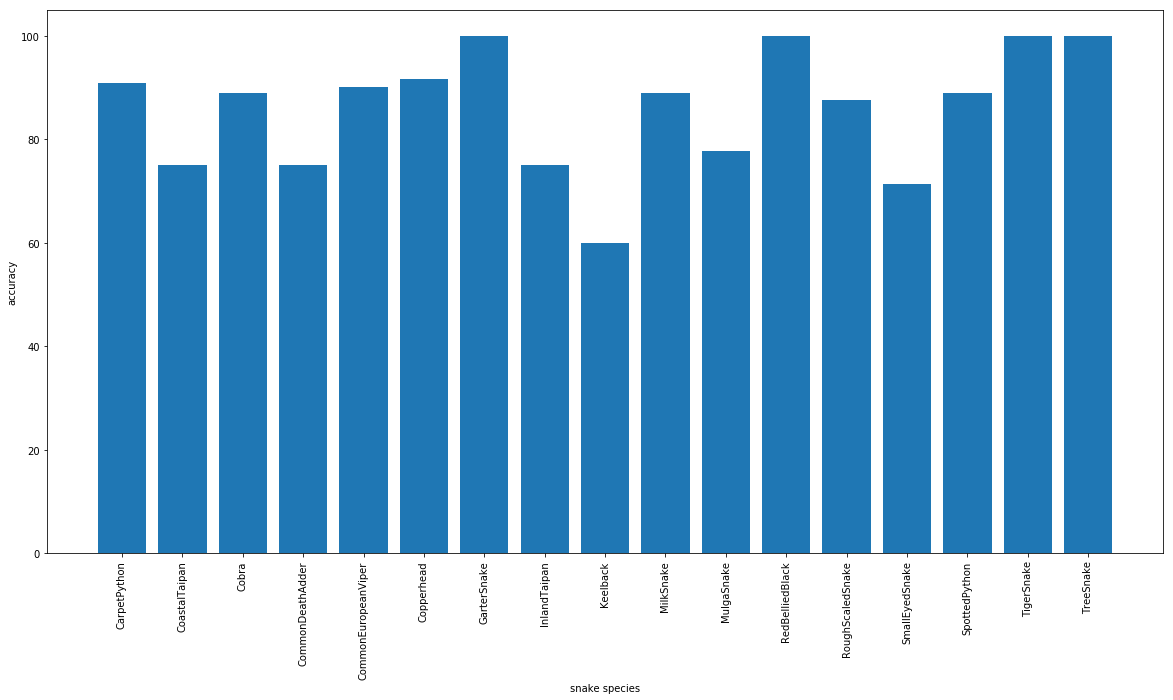

In [22]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.bar(accuracy_each_species.keys(), accuracy_each_species.values(), width=0.8)
plt.xlabel('snake species')
plt.ylabel('accuracy')
# plt.savefig('D:\mymajor\COMP90055ComputingProject\ReportMaterial\\result_accuracy_each_species.PNG')

In [23]:
confidences[incorrect_ind[0]]

{'InlandTaipan': 0.3443943103775382,
 'SmallEyedSnake': 3.5515986382961273,
 'RedBelliedBlack': 95.77609896659851}

In [24]:
result

array([11., 13.,  2.,  5.,  2.,  1.,  0., 11., 12., 15.,  2.,  4.,  0.,
        1., 10.,  1.,  6.,  8., 12.,  5., 14., 14., 13.,  3.,  1., 13.,
        0.,  2.,  1.,  6., 11.,  4., 14., 11., 14.,  4.,  1.,  7., 16.,
        1., 14.,  9.,  5., 15., 13.,  2.,  0., 11., 12.,  5.,  5.,  5.,
       10.,  2., 10.,  6., 13.,  4.,  5., 14.,  0., 14.,  1.,  0.,  6.,
        2., 16.,  5., 11.,  9.,  7., 12., 12.,  6., 11., 11., 15.,  9.,
       12.,  8.,  0.,  0.,  9.,  6.,  3.,  4., 12., 10.,  0.,  4.,  1.,
        6.,  6.,  0., 12., 13.,  9., 10., 11.,  3.,  9., 15.,  4., 11.,
        5., 15.,  2., 10., 14., 10.,  3.,  3.,  9.,  7.,  1.,  8.,  3.,
        5., 11.,  1.,  4.,  4., 10.,  7.,  5.,  3.,  8.,  9.,  5., 14.,
       14., 11., 16.,  6., 10.,  0.,  0.])

In [25]:
gold_standard

array([11., 13.,  2.,  5.,  2.,  1.,  0., 13., 12., 15.,  2.,  4.,  0.,
       10., 10.,  7.,  6.,  8., 12.,  5., 14., 14., 13.,  3.,  1., 13.,
        0.,  2.,  1.,  6., 11.,  4., 14., 11.,  0.,  4.,  8.,  7., 16.,
        1.,  3.,  9.,  5., 15.,  3.,  2.,  0., 11., 12.,  5.,  5.,  5.,
       10.,  2.,  1.,  6., 13.,  4.,  9., 14.,  0., 14., 13.,  0.,  6.,
        2., 16.,  5., 11.,  9.,  7.,  8., 12.,  6., 11., 11., 15.,  9.,
       14.,  8.,  0.,  0.,  9.,  6.,  3.,  4., 12., 10.,  0.,  4., 10.,
        6.,  6.,  0., 12., 13.,  9., 10., 11.,  3.,  9.,  5.,  4., 11.,
        5., 15.,  2.,  1., 14., 10.,  4.,  3.,  9.,  2.,  1., 12.,  3.,
        5., 11.,  1.,  4.,  4., 10.,  7.,  5.,  3.,  8.,  9.,  5., 14.,
       14., 11., 16.,  6., 10.,  0.,  0.])

In [26]:
# model.save('TrainedModel/MyCNN_VGG_Model17.h5')
# ff_model.save('TrainedModel/MyFF_VGG_Model17.h5')

In [27]:
# load pre-trained model
# model = load_model('TrainedModel/MyCNN_RESNET50_Model17.h5')
# ff_model = load_model('TrainedModel/MyFF_RESNET50_Model17.h5')


In [28]:
# test
label = test('1.jpg')
print(label[0])

[4.13312256e-01 4.77027133e-05 1.77338975e-03 4.84083872e-03
 2.91062449e-03 7.70884275e-04 8.78652632e-02 5.06051947e-05
 1.27957594e-02 1.10445704e-04 2.11789666e-06 3.06417322e-04
 1.63461140e-03 1.48157065e-04 9.94727097e+01 7.00545264e-04
 2.31750200e-05]


In [29]:
category_labels

{'CarpetPython': 0,
 'CoastalTaipan': 1,
 'Cobra': 2,
 'CommonDeathAdder': 3,
 'CommonEuropeanViper': 4,
 'Copperhead': 5,
 'GarterSnake': 6,
 'InlandTaipan': 7,
 'Keelback': 8,
 'MilkSnake': 9,
 'MulgaSnake': 10,
 'RedBelliedBlack': 11,
 'RoughScaledSnake': 12,
 'SmallEyedSnake': 13,
 'SpottedPython': 14,
 'TigerSnake': 15,
 'TreeSnake': 16}

In [30]:
class SnakeImage:
    def __init__(self, path):
        stat = test(path)
        self.most_likely_species = labels_category[np.argmax(stat)]
        
        self.confidence = {}
        top_3_idx = np.argsort(stat[0])[-3:]
        top_3_values = [stat[0][j] for j in top_3_idx]
        for j in range(0, 3):
            self.confidence[labels_category[top_3_idx[j]]] = top_3_values[j]*100
            
        with open('Descriptions/'+self.most_likely_species+'.txt') as f:
            self.habitat = f.readline()
            self.scale = f.readline()
            self.is_venemous = f.readline()
        
# obj = SnakeImage('1.jpg')